## Weather Prediction in Australia 


#### This dataset contains daily weather observations from numerous Australian weather stations. The object of this analysis is the predict whether or not it will rain tomorrow by training models on the dataset. 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset 
df=pd.read_csv("weatherAUS.csv")

### Exploring the dataset 

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Extracting column names 


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Displaying decriptive statistics 

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Data Processing 

In [8]:
# Checking for missing values 

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#### From the results columns such as Cloud9am, Cloud3pm, Evaporation and Sunshine are missing lots of values in the range of 55,000 and therefore will have to be droped for the analysis. Those missing values cannot be accounted for.

In [10]:
# droping cloud 9am, cloud 3pm, evaporation, and sunshine because these have a high percentage of NA values


In [11]:
df.drop(['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis = 1, inplace = True)

In [12]:
# checking columns after the drop
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


#### A further analysis of the columns reveals that columns such as location, WindGustDir, WindDir9am, WindDir3pm will be needed for the analysis so they are dropped as well.

In [14]:
df.drop(['Date', 'Location','WindDir9am', 'WindDir3pm', 'WindGustDir', 'RainToday'],axis=1,inplace=True)

In [15]:
# checking columns after operation 


In [16]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [17]:
# To get a better understanding of the dataset, we have to explore the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Temp9am        143693 non-null  float64
 11  Temp3pm        141851 non-null  float64
 12  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(1)
memory usage: 14.4+ MB


#### The results shows that the features RainToday and RainTomorrow have a string data type. 

In [18]:
df.head(20)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,Yes
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,No


#### A display of values in RainTomorrow field shows a YES and NO response and this can be replaced with 1 and 0

### Changing 'Rainfall Tomorrow' Column values to Numeric 

In [19]:
df.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0


#### After droping some of the unwanted features, we can back to check the missing values again 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Temp9am        143693 non-null  float64
 11  Temp3pm        141851 non-null  float64
 12  RainTomorrow   142193 non-null  float64
dtypes: float64(13)
memory usage: 14.4 MB


In [22]:
df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
dtype: int64

### There are a number of missing values and it will be replaced with the mean values of each column 

In [23]:
columns_NaN = df.columns[df.isnull().any()]
columns_NaN

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [24]:
for column in columns_NaN:
    df[column].fillna(df[column].mean(), inplace=True)

In [25]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

#### All missing values has been catered for 

### Visualization 

In [26]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.733400,0.102706,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.897692,0.699211,0.083074
MaxTemp,0.733400,1.000000,-0.074040,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,0.879170,0.968713,-0.157765
Rainfall,0.102706,-0.074040,1.000000,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.011069,-0.077684,0.235345
WindGustSpeed,0.172553,0.065895,0.126446,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.145904,0.031884,0.223085
WindSpeed9am,0.173404,0.014294,0.085925,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.127592,0.004476,0.089404
WindSpeed3pm,0.173058,0.049717,0.056527,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.161060,0.027587,0.085981
Humidity9am,-0.230970,-0.497927,0.221380,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,-0.469641,-0.490709,0.253315
Humidity3pm,0.005995,-0.498760,0.248905,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,-0.216964,-0.555608,0.436013
Pressure9am,-0.423584,-0.308309,-0.159055,-0.425760,-0.215339,-0.277604,0.131503,-0.025848,1.000000,0.959662,-0.397131,-0.265532,-0.231996
Pressure3pm,-0.433147,-0.396622,-0.119541,-0.383938,-0.165388,-0.239659,0.176009,0.048695,0.959662,1.000000,-0.441459,-0.360707,-0.212831


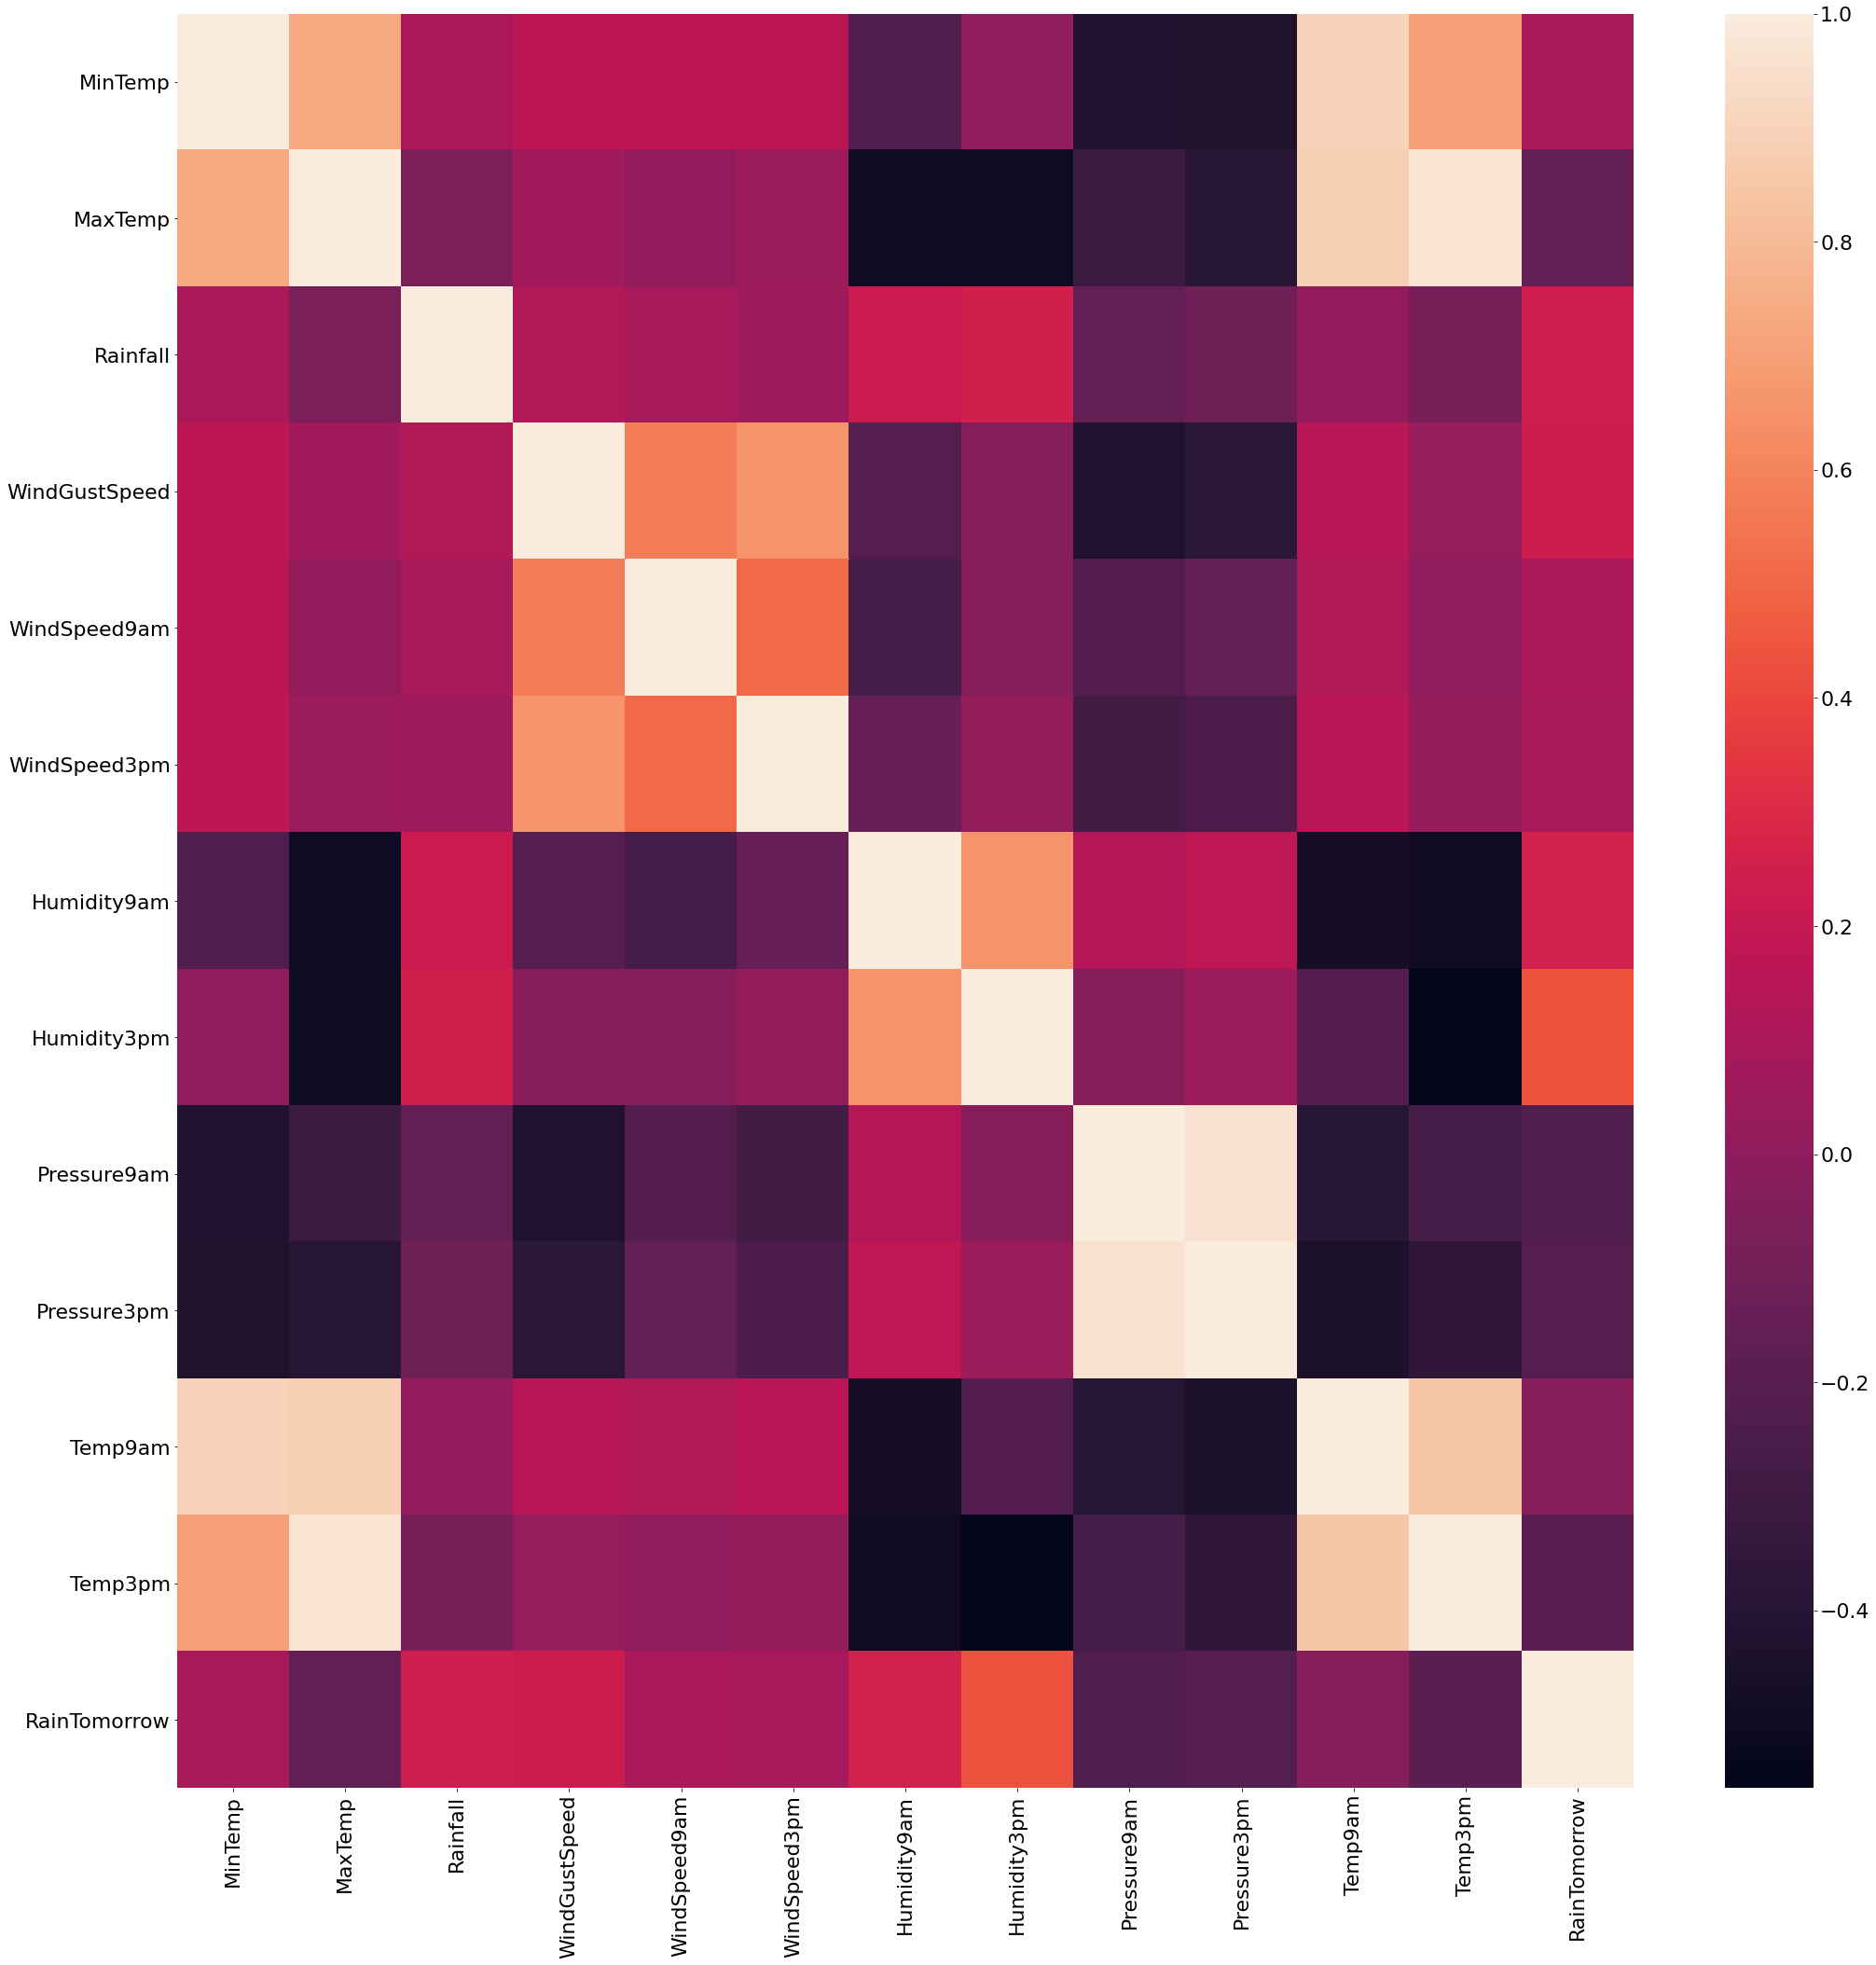

In [27]:
# plotting correlations for features
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(35,35))
sns.heatmap(df.corr())
plt.show() #it looks like a window lmao; instant regret

### Checking for outliers 

In [28]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:>

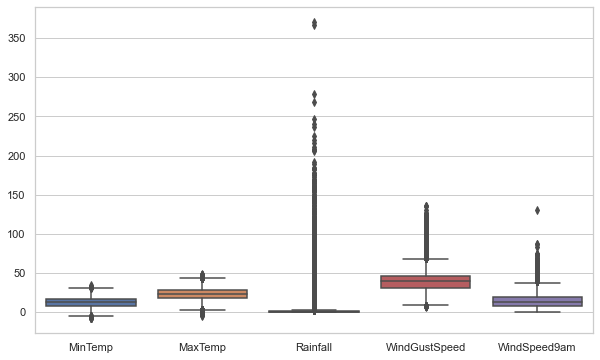

In [29]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am']])

#### From the results Rainfall, WindGuestSPeed and WindSpeed9am have outliers

<AxesSubplot:>

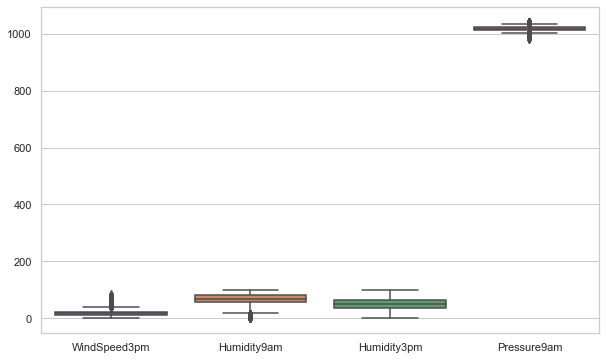

In [30]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am']])

<AxesSubplot:>

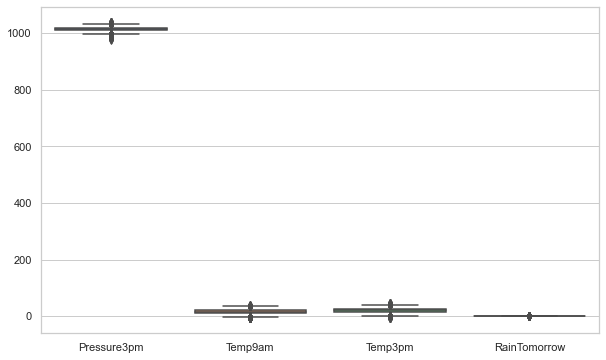

In [31]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']])

### Model Training 

In [32]:
# importing librares and models 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
#Split dataset into input and output columns (x) & (y)

In [34]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [35]:
#Split dataset into 2 new datasets, Train Data (x) & Test Data (y)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [37]:

#Train the model with input and desired output from train data

In [38]:
lm=LogisticRegression()


In [39]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
134437,16.3,22.8,11.0,43.00000,2.0,11.0,96.0,75.0,1009.3,1008.0,18.1,20.4
56804,4.8,16.5,0.0,26.00000,11.0,11.0,91.0,55.0,1024.0,1022.0,8.6,15.3
105782,7.1,23.7,0.0,50.00000,20.0,31.0,28.0,11.0,1016.6,1011.2,11.3,23.2
107417,15.3,19.1,9.8,56.00000,24.0,26.0,96.0,64.0,1017.0,1015.6,15.5,18.0
110343,16.0,22.4,0.0,40.03523,15.0,28.0,54.0,53.0,1021.9,1019.9,18.5,19.5


In [ ]:
lm.fit(x_train,y_train)